In [1]:
from keras.models import Sequential
from keras.layers import Dense

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [5]:
data.drop('Id',axis=1,inplace=True)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
x= data.iloc[:,0:4]
y = data.iloc[:,-1]

In [9]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


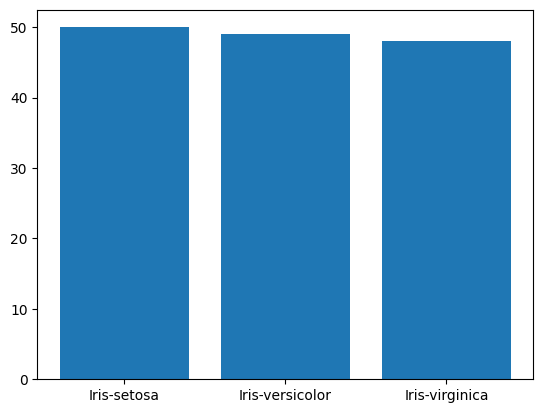

In [11]:
plt.bar(data['Species'].unique(),data['Species'].value_counts())
plt.show()

In [12]:
model  = Sequential()

model.add(Dense(400,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(3,activation='softmax'))


In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
np.unique(y)

array([0, 1, 2])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7054 - loss: 2.2611
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5612 - loss: 2.5553  
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6608 - loss: 0.7276 
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6731 - loss: 0.6282 
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7667 - loss: 0.4174
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8546 - loss: 0.3690  
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7379 - loss: 0.4512
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9054 - loss: 0.2746
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8908 - loss: 0.2697 
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9137 - loss: 0.2268 
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8633 - loss: 0.2254  
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9129 - loss: 0.274

In [ ]:
predictions = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [ ]:
predictions[0]

array([9.9999994e-01, 7.4437083e-09, 4.3778293e-11], dtype=float32)

In [ ]:
print(np.argmax(predictions[0]))

0


In [ ]:
encoder.inverse_transform(np.argmax(predictions[0]).reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Iris-setosa'], dtype=object)

In [ ]:
for i in range(1,11):
  print(pred[i],end="---------------------------------")
  print(y_test_dash[i])

Iris-versicolor---------------------------------Iris-versicolor
Iris-setosa---------------------------------Iris-setosa
Iris-setosa---------------------------------Iris-setosa
Iris-virginica---------------------------------Iris-virginica
Iris-setosa---------------------------------Iris-setosa
Iris-setosa---------------------------------Iris-setosa
Iris-virginica---------------------------------Iris-virginica
Iris-versicolor---------------------------------Iris-versicolor
Iris-setosa---------------------------------Iris-setosa
Iris-versicolor---------------------------------Iris-versicolor


In [ ]:
y_test_dash = encoder.inverse_transform(y_test)

In [ ]:
y_test_dash

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
pred = encoder.inverse_transform(np.argmax(predictions,axis=1))